<a href="https://colab.research.google.com/github/iuliastremciuc/DS-Unit-1-Build/blob/master/Project_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload()  

Saving Crimes_-_2019 (1).csv to Crimes_-_2019 (1).csv


In [0]:
# this is the web site where I got my data from
# https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

crimes_2019 = pd.read_csv('Crimes_-_2019 (1).csv')

In [26]:
#exploring data
print(crimes_2019.shape)
crimes_2019.head()

(258110, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11957665,JD123166,12/28/2019 12:00:00 PM,061XX N SHERIDAN RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,2433,24,48.0,77.0,07,1168514.0,1940972.0,2019,02/05/2020 03:52:05 PM,41.993559,-87.655496,"(41.993558695, -87.655495503)"
1,11927422,JC553758,12/20/2019 08:45:00 AM,095XX S HALSTED ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,2223,22,21.0,73.0,07,1172654.0,1841681.0,2019,02/05/2020 03:52:05 PM,41.721006,-87.643203,"(41.721005667, -87.643202686)"
2,11919937,JC544715,12/04/2019 12:00:00 AM,050XX S WINCHESTER AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,True,931,9,15.0,61.0,17,1164206.0,1871217.0,2019,02/05/2020 03:52:05 PM,41.802238,-87.673316,"(41.802238272, -87.673315925)"
3,11919884,JC544670,12/12/2019 07:28:00 PM,092XX S HOYNE AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,True,True,2221,22,19.0,72.0,26,1164088.0,1843323.0,2019,02/05/2020 03:52:05 PM,41.725696,-87.674532,"(41.72569573, -87.674532181)"
4,11919541,JC544284,12/12/2019 01:17:00 PM,0000X S HALSTED ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1232,12,27.0,28.0,06,1171058.0,1900047.0,2019,02/05/2020 03:52:05 PM,41.881203,-87.647342,"(41.881203182, -87.647342333)"


In [0]:
## dropped irrelevant columns
crimes_19_cd = crimes_2019.drop(['Case Number', 'ID', 'Block', 'X Coordinate',	'Y Coordinate',	'Updated On', 'Community Area', 'FBI Code',	'Latitude',	'Longitude',	'Location', 'Year'], axis = 1)

In [28]:
# dropping NaN values
crimes_19_clean = crimes_19_cd.dropna()
print(crimes_19_clean.shape)
crimes_19_clean.head(10)

(257088, 10)


,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
0,12/28/2019 12:00:00 PM,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,2433,24,48.0
1,12/20/2019 08:45:00 AM,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,2223,22,21.0
2,12/04/2019 12:00:00 AM,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,True,931,9,15.0
3,12/12/2019 07:28:00 PM,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,True,True,2221,22,19.0
4,12/12/2019 01:17:00 PM,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1232,12,27.0
5,12/08/2019 11:55:00 AM,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,713,7,16.0
6,12/09/2019 08:00:00 PM,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,922,9,15.0
7,12/06/2019 07:00:00 PM,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,RESIDENCE,False,False,2432,20,40.0
8,11/30/2019 03:30:00 PM,0462,BATTERY,AGG PRO EMP HANDS SERIOUS INJ,VEHICLE NON-COMMERCIAL,True,False,1133,11,24.0
9,08/22/2019 06:00:00 PM,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,True,1422,14,26.0


In [29]:
sum_crimes = len(crimes_19_clean['District'])
sum_crimes

257088

In [30]:
## converted data types
crimes_19_clean['Arrest'] = crimes_19_clean['Arrest'].astype('int') 
crimes_19_clean['Domestic'] = crimes_19_clean['Domestic'].astype('int')
crimes_19_clean['District'] = crimes_19_clean['District'].astype('str').astype('object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [31]:
crimes_19_clean.dtypes

Date                     object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                 object
Ward                    float64
dtype: object

In [32]:
#checking which districts have higher crime rate
crimes_19_clean['District'].value_counts()

11    18168
6     16656
8     15513
1     15093
18    14986
4     13858
7     13528
12    12995
25    12777
10    12369
3     12353
19    11603
5     11233
2     11046
9     10858
15     9889
14     9158
22     8108
16     8073
24     7872
17     6669
20     4276
31        7
Name: District, dtype: int64

In [33]:
# changed dtype of "Date" column
crimes_19_clean['Date'] = pd.to_datetime(crimes_19_clean['Date'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
#checkin what type of the crime have higher numbers
crimes_19_clean['Primary Type'].value_counts()

THEFT                                62227
BATTERY                              49440
CRIMINAL DAMAGE                      26643
ASSAULT                              20589
DECEPTIVE PRACTICE                   16868
OTHER OFFENSE                        16588
NARCOTICS                            14026
BURGLARY                              9607
MOTOR VEHICLE THEFT                   8970
ROBBERY                               7984
CRIMINAL TRESPASS                     6815
WEAPONS VIOLATION                     6319
OFFENSE INVOLVING CHILDREN            2295
CRIM SEXUAL ASSAULT                   1588
INTERFERENCE WITH PUBLIC OFFICER      1546
PUBLIC PEACE VIOLATION                1518
SEX OFFENSE                           1271
PROSTITUTION                           680
HOMICIDE                               504
ARSON                                  373
LIQUOR LAW VIOLATION                   230
STALKING                               221
CONCEALED CARRY LICENSE VIOLATION      217
KIDNAPPING 

In [35]:
# crosstab two columns to get a data for map
crimes_date = pd.crosstab(crimes_19_clean['District'], crimes_19_clean['Date'].dt.month, margins = True)
district_all = crimes_date['All']
district_all

District
1       15093
10      12369
11      18168
12      12995
14       9158
15       9889
16       8073
17       6669
18      14986
19      11603
2       11046
20       4276
22       8108
24       7872
25      12777
3       12353
31          7
4       13858
5       11233
6       16656
7       13528
8       15513
9       10858
All    257088
Name: All, dtype: int64

In [36]:
from google.colab import files
uploaded = files.upload()

Saving BoundariesPoliceDistricts.zip to BoundariesPoliceDistricts.zip


In [0]:
#website where I downloaded map from
# https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r

In [38]:
#installed geopandas to be able to read map data
!pip install geopandas

     |████████████████████████████████| 921kB 3.4MB/s 
     |████████████████████████████████| 11.8MB 15.9MB/s 
     |████████████████████████████████| 10.1MB 26.1MB/s 


In [39]:
#unzip folder with all map data sets
!unzip BoundariesPoliceDistricts.zip

Archive:  BoundariesPoliceDistricts.zip
  inflating: geo_export_17d66201-4196-4b5b-afdd-f0a5cfc74e89.dbf  
  inflating: geo_export_17d66201-4196-4b5b-afdd-f0a5cfc74e89.shp  
  inflating: geo_export_17d66201-4196-4b5b-afdd-f0a5cfc74e89.shx  
  inflating: geo_export_17d66201-4196-4b5b-afdd-f0a5cfc74e89.prj  


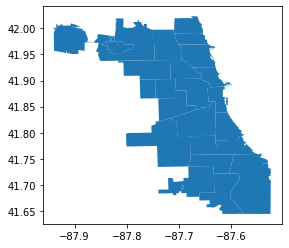

In [40]:
# using geopandas to read data
import geopandas as gpd
chicago = gpd.read_file('geo_export_17d66201-4196-4b5b-afdd-f0a5cfc74e89.shp')
chicago.plot();


In [41]:
#exploring map data set and renaming columns
chicago.head()
chicago_new = chicago.rename({'dist_label': 'District Label', 'dist_num': 'District'}, axis = 1)
chicago_new.head(26)

,District Label,District,geometry
0,17TH,17,"POLYGON ((-87.71067 41.99737, -87.71067 41.997..."
1,20TH,20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990..."
2,31ST,31,"POLYGON ((-87.82818 41.98384, -87.82816 41.983..."
3,31ST,31,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
4,19TH,19,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
5,25TH,25,"POLYGON ((-87.71740 41.93922, -87.71739 41.939..."
6,14TH,14,"POLYGON ((-87.69257 41.93943, -87.69253 41.939..."
7,31ST,31,"POLYGON ((-87.69123 41.69899, -87.69123 41.698..."
8,22ND,22,"POLYGON ((-87.63632 41.73618, -87.63592 41.736..."
9,5TH,5,"POLYGON ((-87.58776 41.72231, -87.58762 41.722..."


In [42]:
# I had dropped row with district '31' because - " According to 
#Officer Joseph A. Candella of the Chicago Police Department,
# “District 31 is used as a code for "’Out of City’"
# (email correspondence, August 28th, 2017). These records will be dropped from 
#later analyses, but are shown here in this one table for completeness"
chicago_clean = chicago_new.drop([chicago_new.index[2], chicago_new.index[3], chicago_new.index[7]])
chicago_clean.shape

(22, 3)

In [43]:
# merged my crime dataset with map dataset 
merged = pd.merge(chicago_clean, district_all,
                  on = "District",
                  how = 'inner')
                
merged.head(26)
merged.sort_values(by = 'All')

,District Label,District,geometry,All
1,20TH,20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990...",4276
0,17TH,17,"POLYGON ((-87.71067 41.99737, -87.71067 41.997...",6669
7,24TH,24,"POLYGON ((-87.67424 42.02300, -87.66541 42.022...",7872
8,16TH,16,"POLYGON ((-87.80655 42.01896, -87.80655 42.018...",8073
5,22ND,22,"POLYGON ((-87.63632 41.73618, -87.63592 41.736...",8108
4,14TH,14,"POLYGON ((-87.69257 41.93943, -87.69253 41.939...",9158
21,15TH,15,"POLYGON ((-87.74598 41.90235, -87.74598 41.902...",9889
19,9TH,9,"POLYGON ((-87.63193 41.86015, -87.63117 41.860...",10858
20,2ND,2,"POLYGON ((-87.60769 41.83858, -87.60618 41.838...",11046
6,5TH,5,"POLYGON ((-87.58776 41.72231, -87.58762 41.722...",11233


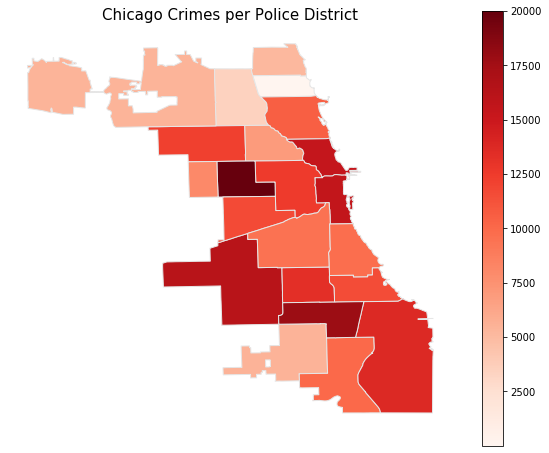

In [52]:
#plotting map using matplotlib
variable = 'All'
vmin, vmax = 1, 20000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column=variable, cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9')
ax.axis('off')
#creating a title
ax.set_title('Chicago Crimes per Police District', fontdict={'fontsize': '15', 'fontweight' : '3'})

             
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data rang
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [53]:
# crosstab to see how many arrest was made 
arrest = pd.crosstab(crimes_19_clean['Primary Type'], crimes_19_clean['Arrest'])
arrest

Arrest,0,1
Primary Type,,
ARSON,343,30
ASSAULT,16859,3730
BATTERY,39129,10311
BURGLARY,9110,497
CONCEALED CARRY LICENSE VIOLATION,5,212
CRIM SEXUAL ASSAULT,1492,96
CRIMINAL DAMAGE,24980,1663
CRIMINAL TRESPASS,3027,3788
DECEPTIVE PRACTICE,16044,824


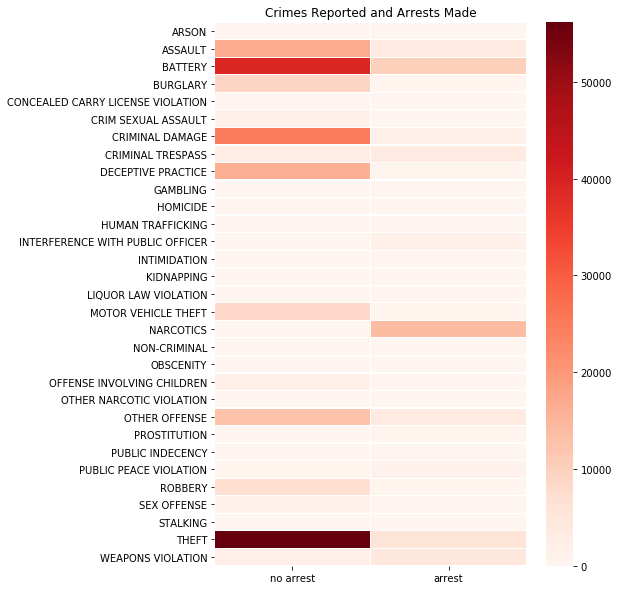

In [57]:
#used seaborn to create heatmap
import numpy as np
import seaborn as sns
 
plt.figure(figsize=(7, 10))
xticks = ['no arrest', 'arrest']
ax = sns.heatmap(arrest, xticklabels=xticks, cmap = 'Reds', linewidths=.2)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.title('Crimes Reported and Arrests Made')
plt.show()
